<a href="https://colab.research.google.com/github/hellomstars/DeepLearning/blob/main/Keras_MLP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras를 사용한 MLP 구현


## Sequential API를 사용한 regression MLP

In [ ]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import fetch_california_housing #캘리포니아 주택 데이터셋을 로드
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42) #데이터셋을 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42) #검증을 위해 train, valid, test 데이터로 분리

scaler = StandardScaler() #표준화
X_train = scaler.fit_transform(X_train) #train 데이터를 학습시키면서 스케일링한다.
X_valid = scaler.transform(X_valid) #valid 데이터를 스케일링한다.
X_test = scaler.transform(X_test) #test 데이터를 스케일링한다.

### MSE loss funtion 사용

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]), #은닉층에서 활동하는 뉴런의 수 30개, relu 활성화 함수, 입력벡터 크기. flatten 없이 input_shape로 첫째 데이터 정해줄 수 있다.
    keras.layers.Dense(1) #출력층. 출력되는 결과값은 1개
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3)) #regression의 손실함수 중 MSE 사용. 경사하강법 최적화.
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid)) #20번 학습 실행
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 2.5160 - val_loss: 1.2468
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9055 - val_loss: 0.7865
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8032 - val_loss: 0.7747
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7532 - val_loss: 0.6962
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7098 - val_loss: 0.7340
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6760 - val_loss: 0.6678
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6437 - val_loss: 0.6769
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6164 - val_loss: 0.5645
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5901 - val_loss: 0.5666
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5678 - val_loss: 0.5224

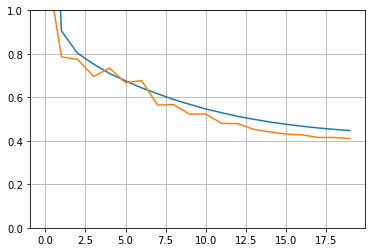

In [ ]:
plt.plot(pd.DataFrame(history.history)) #train, test데이터의 epoch에 따른 loss 값 출력
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
y_pred #예측값 출력

array([[0.69615567],
       [1.6534257 ],
       [3.1996484 ]], dtype=float32)

## Functional API를 사용한 regression MLP

### Wide&Deep

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:]) #입력층
hidden1 = keras.layers.Dense(30, activation="relu")(input_) #30개 layer 은닉층1, relu 활성화함수
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1) #30개 layer 은닉층2, relu 활성화함수
concat = keras.layers.concatenate([input_, hidden2]) #결합층. 입력층과 은닉층2를 연결해준다.
output = keras.layers.Dense(1)(concat) #출력층
model = keras.models.Model(inputs=[input_], outputs=[output]) #입력, 출력이 지정된 모델 생성

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 30)           930         ['dense_2[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_3[0][0]']            

In [ ]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3)) #MSE 손실함수 사용. 경사하강법 최적화.

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid)) #20번 학습 훈련
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 2ms/step - loss: 1.9841 - val_loss: 1.1812
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6992 - val_loss: 0.6510
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6211 - val_loss: 0.6243
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5824 - val_loss: 0.6221
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5527 - val_loss: 0.5393
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5300 - val_loss: 0.5064
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5143 - val_loss: 0.5156
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5031 - val_loss: 0.5685
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4903 - val_loss: 0.4885
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4817 - val_loss: 0.4623

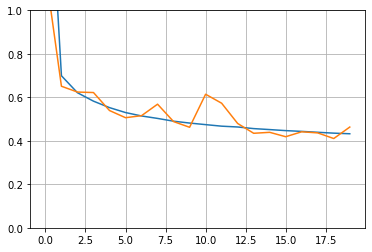

In [ ]:
plt.plot(pd.DataFrame(history.history)) #train, test데이터의 epoch에 따른 loss 값 출력
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Wide&Deep - Multiple input

In [ ]:
#입력층 2개. 5개의 특성을 와이드 경로, 6개의 특성을 딥 경로에 전달. 겹치는 3개의 특성은 양쪽에 모두 전달된다.
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                            

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:] #train 데이터를 나눈다
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:] #valid 데이터를 나눈다
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:] #test 데이터를 나눈다
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3] #예측을 위해 new 데이터를 나눈다

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.7797 - val_loss: 0.9529
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6743 - val_loss: 0.5973
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5981 - val_loss: 0.5445
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5584 - val_loss: 0.5564
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5327 - val_loss: 0.5041
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5098 - val_loss: 0.4791
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4945 - val_loss: 0.4530
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4808 - val_loss: 0.4398
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4698 - val_loss: 0.4536
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4621 - val_loss: 0.4253

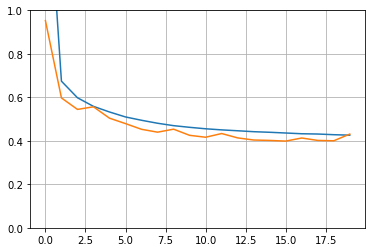

In [ ]:
plt.plot(pd.DataFrame(history.history)) #train, test데이터의 epoch에 따른 loss 값 출력
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### 규제를 위해 보조 출력층 추가 (입력과 출력이 multiple)

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2) #출력층 추가
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [ ]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3)) #모델 각각에 mse 손실 함수 사용하고 가중치를 지정해준다

In [ ]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.4414 - main_output_loss: 2.2847 - aux_output_loss: 3.8521 - val_loss: 5.8677 - val_main_output_loss: 6.0233 - val_aux_output_loss: 4.4672
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.0771 - main_output_loss: 0.9225 - aux_output_loss: 2.4685 - val_loss: 3.1438 - val_main_output_loss: 2.9918 - val_aux_output_loss: 4.5116
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8586 - main_output_loss: 0.7451 - aux_output_loss: 1.8809 - val_loss: 1.7922 - val_main_output_loss: 1.5400 - val_aux_output_loss: 4.0619
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7678 - main_output_loss: 0.6708 - aux_output_loss: 1.6409 - val_loss: 1.2555 - val_main_output_loss: 0.9951 - val_aux_output_loss: 3.5992
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7195 - main_output_loss: 0.6291 - aux_output_loss: 1.5330 - val_loss

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 122ms/step


## Subclassing API를 사용한 동적 모델

In [ ]:
class WideAndDeepModel(keras.models.Model): #클래스 선언은 재활용할 수 있는 경우에 적합
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) #표준 매개변수 처리
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs): #호출
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu") #실제 모델 사용 코드

In [ ]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.8918 - output_1_loss: 2.6140 - output_2_loss: 5.3925 - val_loss: 1.4956 - val_output_1_loss: 1.1805 - val_output_2_loss: 4.3319
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 1.1779 - output_1_loss: 0.9266 - output_2_loss: 3.4396 - val_loss: 1.3124 - val_output_1_loss: 0.8828 - val_output_2_loss: 5.1789
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8892 - output_1_loss: 0.7267 - output_2_loss: 2.3525 - val_loss: 1.3821 - val_output_1_loss: 0.8493 - val_output_2_loss: 6.1774
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7828 - output_1_loss: 0.6655 - output_2_loss: 1.8390 - val_loss: 1.1719 - val_output_1_loss: 0.6349 - val_output_2_loss: 6.0050
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7234 - output_1_loss: 0.6274 - output_2_loss: 1.5875 - val_loss: 1.0399 - val_output_1_loss: 0.5864 - val_ou

## 저장과 복원

In [ ]:
#모델 생성
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.6741 - val_loss: 1.6513
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.7370 - val_loss: 0.6355
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6404 - val_loss: 0.5979
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5985 - val_loss: 0.5523
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5656 - val_loss: 0.5181
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5366 - val_loss: 0.4911
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5127 - val_loss: 0.4695
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4920 - val_loss: 0.4498
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4747 - val_loss: 0.4343
Epoch 10/10
162/162 [==============================] - 0s 818us/step - loss: 0.4392


In [ ]:
model.save("my_keras_model.h5") #모델 저장

In [ ]:
model = keras.models.load_model("my_keras_model.h5") #불러오기

In [ ]:
model.predict(X_new) #불러온 모델로 예측

1/1 [==============================] - 0s 48ms/step


array([[0.70601255],
       [1.3752093 ],
       [3.1718638 ]], dtype=float32)

## Callback 사용

In [ ]:
keras.backend.clear_session()

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])#모델 생성

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3)) #모델 컴파일

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True) #validation 관련 loss를 통해 판단
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # 최상의 모델로 복원
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.6075 - val_loss: 1.6124
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7078 - val_loss: 0.6510
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6253 - val_loss: 0.5791
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5718 - val_loss: 0.5287
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5311 - val_loss: 0.4883
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4982 - val_loss: 0.4589
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4735 - val_loss: 0.4354
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4540 - val_loss: 0.4215
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4395 - val_loss: 0.4093
Epoch 10/10
162/162 [==============================] - 0s 879us/step - loss: 0.4315


In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3)) #모델 컴파일
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True) #조기종료 판단 기준 설정. 10번 연속으로 좋아지는 값 없으면 멈추고 훈련 끝났을 때 최적의 모델 save. 이는 overfitting 막기 위함.
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb]) #세운 기준만큼 훈련 후 종료하면 save
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4210 - val_loss: 0.4136
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4150 - val_loss: 0.4323
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4104 - val_loss: 0.4230
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4066 - val_loss: 0.4455
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4037 - val_loss: 0.4301
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4006 - val_loss: 0.4394
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3985 - val_loss: 0.4651
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3963 - val_loss: 0.4328
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3942 - val_loss: 0.4345
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3923 - val_lo

In [ ]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs): #콜백 재정의 가능
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [ ]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

357/363 [============================>.] - ETA: 0s - loss: 0.4147
val/train: 1.01
363/363 [==============================] - 1s 2ms/step - loss: 0.4150 - val_loss: 0.4191


## Tensorboard 사용한 시각화

In [ ]:
import os
root_logdir = os.path.join(os.curdir, "my_logs") #콜백과정에서 나온 로그 저장

In [ ]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2022_10_09-20_41_01'

In [ ]:
#모델 구성과 컴파일
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.7969 - val_loss: 1.0110
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.8109 - val_loss: 0.7656
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7460 - val_loss: 0.7211
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.7007 - val_loss: 0.6535
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6649 - val_loss: 0.6144
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6332 - val_loss: 0.5849
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6065 - val_loss: 0.5600
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5825 - val_loss: 0.5382
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5612 - val_loss: 0.5196
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5423 - val_loss: 0.5032

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006